<a href="https://colab.research.google.com/github/Prayagupadhyay/Machine_Learning_Codes/blob/main/Loan_Applicant_Credti_RIsk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/ML Project - KNN Loan Applicant Credit Risk Analysis.csv')


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64


In [ ]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [ ]:
df.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [ ]:
Q1 , Q3  = np.percentile(df['Total bounces past12months'],[25,75])
Q1_1 , Q3_1  = np.percentile(df['Overdrafts past12months'],[25,75])

In [ ]:
print(Q1 , Q3)
print(Q1_1 , Q3_1)

0.0 1.0
0.0 0.0


In [ ]:
df['Total bounces past12months'].quantile(0.75)

1.0

In [ ]:
iqr = Q3 - Q1
print(iqr)
iqr_1 = Q3_1 - Q1_1
print(iqr_1)

1.0
0.0


In [ ]:
lower_bound  = Q1 - (0.5*iqr)
upper_bound  = Q3 + (0.5*iqr)
lower_bound_1 = Q1_1 - (1.5*iqr)
upper_bound_1 = Q3_1 + (1.5*iqr)

In [ ]:
print(lower_bound , upper_bound  , lower_bound_1 , upper_bound_1)

-0.5 1.5 -1.5 1.5


In [ ]:
df[(df['Total bounces past12months'] < lower_bound) | (df['Total bounces past12months'] > upper_bound)]

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
11,40.00,1,3,0.638168,836,1,2
12,38.00,1,3,0.714286,763,0,2
17,38.00,1,3,0.825877,593,1,2
18,39.92,2,3,0.760994,731,1,2
20,33.00,2,4,1.000000,752,2,2
...,...,...,...,...,...,...,...
8949,36.70,3,3,0.762618,779,2,9
8950,29.20,3,3,0.133430,726,4,8
8953,38.83,1,3,0.535044,773,0,7
8955,43.12,2,4,0.922790,798,1,4


In [ ]:
df_no_outliar = df[(df['Total bounces past12months'] > lower_bound) & (df['Total bounces past12months'] < upper_bound)]
print(df_no_outliar)

        Age  Total Work Experience  Number of years in city  \
0     40.50                      2                        6   
1     41.25                      5                        2   
2     39.50                      5                        2   
3     35.00                      1                        4   
4     34.00                      3                        3   
...     ...                    ...                      ...   
8990  30.80                      3                        3   
8991  31.83                      3                        6   
8992  32.67                      2                        5   
8993  37.00                      3                        3   
8994  32.08                      1                        6   

      Cost to Request Ratio  Cibil score  Overdrafts past12months  \
0                  0.842666          594                        0   
1                  0.791667          754                        0   
2                  0.727273         

In [ ]:
df_no_outliar.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000
mean,38.810717,2.169913,4.280553,0.821177,750.931696,0.067316,0.171041
std,10.189446,0.891062,1.277362,0.472467,70.378785,0.259985,0.376572
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.654433,727.000000,0.000000,0.000000
50%,37.170000,2.000000,4.000000,0.799592,768.000000,0.000000,0.000000
75%,45.420000,3.000000,5.000000,0.912665,798.000000,0.000000,0.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,5.000000,1.000000


In [ ]:
df_no_outliar_1 = df[(df['Overdrafts past12months'] > lower_bound) & (df['Overdrafts past12months'] < upper_bound)]
print(df_no_outliar_1)

        Age  Total Work Experience  Number of years in city  \
0     40.50                      2                        6   
1     41.25                      5                        2   
2     39.50                      5                        2   
3     35.00                      1                        4   
4     34.00                      3                        3   
...     ...                    ...                      ...   
8990  30.80                      3                        3   
8991  31.83                      3                        6   
8992  32.67                      2                        5   
8993  37.00                      3                        3   
8994  32.08                      1                        6   

      Cost to Request Ratio  Cibil score  Overdrafts past12months  \
0                  0.842666          594                        0   
1                  0.791667          754                        0   
2                  0.727273         

In [ ]:
df_no_outliar_1.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000
mean,38.878196,2.134665,4.297944,0.828341,752.720509,0.160593,0.848400
std,10.230795,0.892658,1.269122,0.487408,68.219162,0.367177,1.820827
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.920000,1.000000,3.000000,0.658495,730.000000,0.000000,0.000000
50%,37.300000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.500000,3.000000,5.000000,0.925584,798.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,1.000000,12.000000


In [ ]:
print(df_no_outliar)
print(df_no_outliar_1)


        Age  Total Work Experience  Number of years in city  \
0     40.50                      2                        6   
1     41.25                      5                        2   
2     39.50                      5                        2   
3     35.00                      1                        4   
4     34.00                      3                        3   
...     ...                    ...                      ...   
8990  30.80                      3                        3   
8991  31.83                      3                        6   
8992  32.67                      2                        5   
8993  37.00                      3                        3   
8994  32.08                      1                        6   

      Cost to Request Ratio  Cibil score  Overdrafts past12months  \
0                  0.842666          594                        0   
1                  0.791667          754                        0   
2                  0.727273         

In [ ]:
merged_df = pd.merge(df_no_outliar, df_no_outliar_1, left_index=True, right_index=True, suffixes=('_bounces', '_overdrafts'))

In [ ]:
print(merged_df.describe())

       Age_bounces  Total Work Experience_bounces  \
count  7078.000000                    7078.000000   
mean     38.812612                       2.169963   
std      10.193338                       0.891177   
min      18.100000                       1.000000   
25%      30.830000                       1.000000   
50%      37.170000                       2.000000   
75%      45.420000                       3.000000   
max      83.800000                       5.000000   

       Number of years in city_bounces  Cost to Request Ratio_bounces  \
count                      7078.000000                    7078.000000   
mean                          4.280588                       0.821132   
std                           1.277668                       0.472627   
min                           1.000000                       0.008466   
25%                           3.000000                       0.654433   
50%                           4.000000                       0.799581   
75%        

In [ ]:
merged_df.describe()

,Age_bounces,Total Work Experience_bounces,Number of years in city_bounces,Cost to Request Ratio_bounces,Cibil score_bounces,Overdrafts past12months_bounces,Total bounces past12months_bounces,Age_overdrafts,Total Work Experience_overdrafts,Number of years in city_overdrafts,Cost to Request Ratio_overdrafts,Cibil score_overdrafts,Overdrafts past12months_overdrafts,Total bounces past12months_overdrafts
count,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000
mean,38.812612,2.169963,4.280588,0.821132,750.954224,0.064708,0.170528,38.812612,2.169963,4.280588,0.821132,750.954224,0.064708,0.170528
std,10.193338,0.891177,1.277668,0.472627,70.395169,0.246026,0.376123,10.193338,0.891177,1.277668,0.472627,70.395169,0.246026,0.376123
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.654433,727.000000,0.000000,0.000000,30.830000,1.000000,3.000000,0.654433,727.000000,0.000000,0.000000
50%,37.170000,2.000000,4.000000,0.799581,768.000000,0.000000,0.000000,37.170000,2.000000,4.000000,0.799581,768.000000,0.000000,0.000000
75%,45.420000,3.000000,5.000000,0.912665,798.000000,0.000000,0.000000,45.420000,3.000000,5.000000,0.912665,798.000000,0.000000,0.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,1.000000,1.000000,83.800000,5.000000,6.000000,12.006623,882.000000,1.000000,1.000000


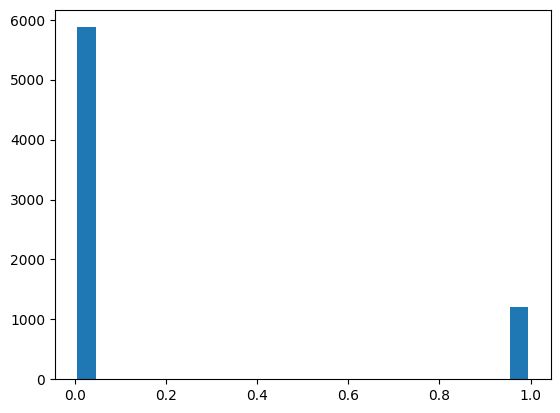

In [ ]:
plt.hist(df_no_outliar['Total bounces past12months'] , bins = 20 ,rwidth = 0.8)
plt.show()

In [ ]:
X = merged_df.iloc[: , :-1].values
y = merged_df.iloc[: , -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1173    2]
 [ 236    5]]


In [ ]:
accuracy_score(y_test, y_pred)

0.8319209039548022

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1175
           1       0.71      0.02      0.04       241

    accuracy                           0.83      1416
   macro avg       0.77      0.51      0.47      1416
weighted avg       0.81      0.83      0.76      1416

